In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

In [2]:
from google.colab import files
upload = files.upload()

Saving listings.csv to listings.csv


In [3]:
df = pd.read_csv(io.BytesIO(upload['listings.csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11854 non-null  int64  
 1   listing_url                                   11854 non-null  object 
 2   scrape_id                                     11854 non-null  int64  
 3   last_scraped                                  11854 non-null  object 
 4   source                                        11854 non-null  object 
 5   name                                          11854 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         6800 non-null   object 
 8   picture_url                                   11854 non-null  object 
 9   host_id                                       11854 non-null 

## Data Cleaning
### Getting rid of the '$' sign and comas, as well as changing the 'price' column to a float data type. In addition, converting all the date values into a datetime data type.

In [8]:
df['price'] = df['price'].str.strip().str.replace('$', '').str.replace(',', '').astype(int)

ValueError: invalid literal for int() with base 10: '192.00'

In [7]:
df['price'] = df['price'].str.replace('[^\d.]', '', regex=True).astype(str)

In [9]:
print(df['price'].unique())

['192.00' '95.00' '150.00' '189.00' '81.00' '93.00' '46.00' '31.00'
 '110.00' '75.00' '120.00' '243.00' '190.00' '53.00' 'nan' '100.00'
 '155.00' '90.00' '38.00' '220.00' '431.00' '259.00' '360.00' '329.00'
 '66.00' '450.00' '140.00' '29.00' '117.00' '72.00' '40.00' '200.00'
 '253.00' '281.00' '137.00' '39.00' '62.00' '103.00' '70.00' '96.00'
 '105.00' '180.00' '159.00' '80.00' '65.00' '121.00' '123.00' '86.00'
 '306.00' '130.00' '101.00' '393.00' '24.00' '87.00' '270.00' '175.00'
 '42.00' '240.00' '145.00' '960.00' '50.00' '400.00' '27.00' '115.00'
 '280.00' '60.00' '47.00' '45.00' '37.00' '160.00' '89.00' '221.00'
 '43.00' '193.00' '217.00' '26.00' '84.00' '125.00' '129.00' '25.00'
 '74.00' '500.00' '35.00' '440.00' '256.00' '250.00' '197.00' '30.00'
 '210.00' '85.00' '337.00' '34.00' '48.00' '55.00' '78.00' '71.00'
 '226.00' '41.00' '350.00' '58.00' '157.00' '149.00' '61.00' '69.00'
 '302.00' '314.00' '56.00' '136.00' '97.00' '107.00' '111.00' '59.00'
 '51.00' '480.00' '300.00' '131

In [10]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [11]:
df['price']

0        192.0
1         95.0
2        150.0
3        189.0
4         81.0
         ...  
11849     67.0
11850    151.0
11851    180.0
11852     82.0
11853      NaN
Name: price, Length: 11854, dtype: float64

In [13]:
#from datetime import datetime
df['first_review'] = df['first_review'].astype(str)
df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')

In [14]:
df['first_review']

0       2012-01-04
1       2012-04-23
2       2014-08-13
3       2012-03-15
4       2012-04-02
           ...    
11849          NaT
11850          NaT
11851          NaT
11852          NaT
11853          NaT
Name: first_review, Length: 11854, dtype: datetime64[ns]

In [15]:
df['last_review'] = df['last_review'].astype(str)

df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')


In [16]:
df['last_review']

0       2023-12-03
1       2023-10-01
2       2023-11-28
3       2023-12-10
4       2023-11-23
           ...    
11849          NaT
11850          NaT
11851          NaT
11852          NaT
11853          NaT
Name: last_review, Length: 11854, dtype: datetime64[ns]

In [17]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'])

In [18]:
df['last_scraped']

0       2023-12-16
1       2023-12-16
2       2023-12-16
3       2023-12-16
4       2023-12-16
           ...    
11849   2023-12-16
11850   2023-12-16
11851   2023-12-16
11852   2023-12-16
11853   2023-12-16
Name: last_scraped, Length: 11854, dtype: datetime64[ns]

In [19]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [20]:
df['host_since']

0       2011-09-14
1       2011-08-12
2       2011-09-14
3       2011-09-14
4       2012-02-04
           ...    
11849   2016-06-20
11850   2020-02-20
11851   2014-08-30
11852   2016-02-11
11853   2018-02-22
Name: host_since, Length: 11854, dtype: datetime64[ns]

In [21]:
df.shape

(11854, 75)

In [22]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★4.78 · 2 bedrooms ·...,NaN,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,...,4.96,4.70,4.64,3306300031048,t,4,4,0,0,0.57
1,247452,https://www.airbnb.com/rooms/247452,20231215200342,2023-12-16,city scrape,Rental unit in Saint-Médard-en-Jalles · ★4.83 ...,NaN,NaN,https://a0.muscache.com/pictures/39503733/4b3c...,959918,...,4.90,4.51,4.70,NaN,f,1,1,0,0,0.46
2,317273,https://www.airbnb.com/rooms/317273,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★4.89 · 1 bedroom · ...,NaN,Bordeaux's famous Jardin Public is at the end ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,...,4.94,4.94,4.71,33063001366CB,f,4,4,0,0,0.47
3,317658,https://www.airbnb.com/rooms/317658,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★4.88 · 2 bedrooms ·...,NaN,The Key to Bordeaux apartment is ideally locat...,https://a0.muscache.com/pictures/a5da668b-39dd...,1156398,...,4.92,4.96,4.76,33063001225CF,t,4,4,0,0,0.92
4,333031,https://www.airbnb.com/rooms/333031,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★4.91 · Studio · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/3643e626-de1f...,1697156,...,4.92,4.98,4.82,3306300055979,f,2,1,1,0,3.33


In [23]:
df.tail(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11844,1044814844088596486,https://www.airbnb.com/rooms/1044814844088596486,20231215200342,2023-12-15,city scrape,Home in Gradignan · ★New · 4 bedrooms · 5 beds...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,154026618,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
11845,1044894031079555605,https://www.airbnb.com/rooms/1044894031079555605,20231215200342,2023-12-15,city scrape,Home in Mérignac · ★New · 3 bedrooms · 2 beds ...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,35806566,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
11846,1045035415285120454,https://www.airbnb.com/rooms/1045035415285120454,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★New · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,157740775,...,NaN,NaN,NaN,33063010972DF,f,1,1,0,0,NaN
11847,1045362443585753779,https://www.airbnb.com/rooms/1045362443585753779,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★New · 2 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,550766188,...,NaN,NaN,NaN,33063010974EB,f,1,1,0,0,NaN
11848,1045588868793591701,https://www.airbnb.com/rooms/1045588868793591701,20231215200342,2023-12-16,city scrape,Rental unit in Bruges · ★New · 1 bedroom · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,101667575,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
11849,1045758300437171774,https://www.airbnb.com/rooms/1045758300437171774,20231215200342,2023-12-16,city scrape,Rental unit in Talence · ★New · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,78852374,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
11850,1046101167748549603,https://www.airbnb.com/rooms/1046101167748549603,20231215200342,2023-12-16,city scrape,Home in Bordeaux · ★New · 2 bedrooms · 3 beds ...,NaN,"On the banks of the Garonne, the Chartrons dis...",https://a0.muscache.com/pictures/prohost-api/H...,337698666,...,NaN,NaN,NaN,33063003943C3,t,49,48,1,0,NaN
11851,1046123918688345009,https://www.airbnb.com/rooms/1046123918688345009,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★New · 2 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20724655,...,NaN,NaN,NaN,330630109588B,f,1,1,0,0,NaN
11852,1046269638002864373,https://www.airbnb.com/rooms/1046269638002864373,20231215200342,2023-12-16,city scrape,Rental unit in Bordeaux · ★New · 2 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,58311829,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",t,1,1,0,0,NaN
11853,1046327906669372136,https://www.airbnb.com/rooms/1046327906669372136,20231215200342,2023-12-16,city scrape,Home in Bordeaux · ★New · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,174753656,...,NaN,NaN,NaN,33063010976F7,f,1,1,0,0,NaN


In [24]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [25]:
df.room_type.unique()
#types of property

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [26]:
for column in df.columns:
  num_unique_values = df[column].nunique()
  print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in id: 11854
Number of unique values in listing_url: 11854
Number of unique values in scrape_id: 1
Number of unique values in last_scraped: 3
Number of unique values in source: 2
Number of unique values in name: 6887
Number of unique values in description: 0
Number of unique values in neighborhood_overview: 6255
Number of unique values in picture_url: 11711
Number of unique values in host_id: 9361
Number of unique values in host_url: 9361
Number of unique values in host_name: 2634
Number of unique values in host_since: 3343
Number of unique values in host_location: 513
Number of unique values in host_about: 3061
Number of unique values in host_response_time: 4
Number of unique values in host_response_rate: 53
Number of unique values in host_acceptance_rate: 97
Number of unique values in host_is_superhost: 2
Number of unique values in host_thumbnail_url: 9101
Number of unique values in host_picture_url: 9101
Number of unique values in host_neighbourhood: 52
Numbe

In [27]:
 #amount of null variables in each column
 df.loc[:, 'id':'first_review'].isnull().sum()
 #60 variables max

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
source                              0
name                                0
description                     11854
neighborhood_overview            5054
picture_url                         0
host_id                             0
host_url                            0
host_name                           0
host_since                          0
host_location                    2012
host_about                       7370
host_response_time               5048
host_response_rate               5048
host_acceptance_rate             3450
host_is_superhost                  12
host_thumbnail_url                  0
host_picture_url                    0
host_neighbourhood               8906
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identit

In [28]:
 df.loc[:, 'last_review':'reviews_per_month'].isnull().sum()

last_review                                     1913
review_scores_rating                            1909
review_scores_accuracy                          1913
review_scores_cleanliness                       1911
review_scores_checkin                           1915
review_scores_communication                     1913
review_scores_location                          1915
review_scores_value                             1915
license                                         7373
instant_bookable                                   0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1913
dtype: int64

In [29]:
missing_percentage_first = df.loc[:, 'id':'first_review'].isnull().mean() * 100


missing_percentage_second = df.loc[:, 'last_review':'reviews_per_month'].isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage_first, "\n")
print(missing_percentage_second)

Percentage of missing values for each column:
id                                0.000000
listing_url                       0.000000
scrape_id                         0.000000
last_scraped                      0.000000
source                            0.000000
name                              0.000000
description                     100.000000
neighborhood_overview            42.635397
picture_url                       0.000000
host_id                           0.000000
host_url                          0.000000
host_name                         0.000000
host_since                        0.000000
host_location                    16.973174
host_about                       62.173106
host_response_time               42.584782
host_response_rate               42.584782
host_acceptance_rate             29.104100
host_is_superhost                 0.101232
host_thumbnail_url                0.000000
host_picture_url                  0.000000
host_neighbourhood               75.130758
host_lis

### We can see that there are no data at all in 'description', 'bathrooms', 'bedrooms' and 'calendar_updated' columns. In addition, most likely columns 'listing_url', 'scrape_id', 'name', 'picture_url' and others (see below) won't be any use for the analysis, so all of them can be removed.

In [30]:
df = df.drop(['listing_url','scrape_id','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_location','host_about',
              'host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','bathrooms','bedrooms','amenities','calendar_updated','calendar_last_scraped','license'], axis = 1)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            11854 non-null  int64         
 1   last_scraped                                  11854 non-null  datetime64[ns]
 2   source                                        11854 non-null  object        
 3   host_since                                    11854 non-null  datetime64[ns]
 4   host_response_time                            6806 non-null   object        
 5   host_response_rate                            6806 non-null   object        
 6   host_acceptance_rate                          8404 non-null   object        
 7   host_is_superhost                             11842 non-null  object        
 8   host_listings_count                           11854 non-null  int6

In [32]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# no duplicates found

Duplicate Rows:
Empty DataFrame
Columns: [id, last_scraped, source, host_since, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, beds, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated

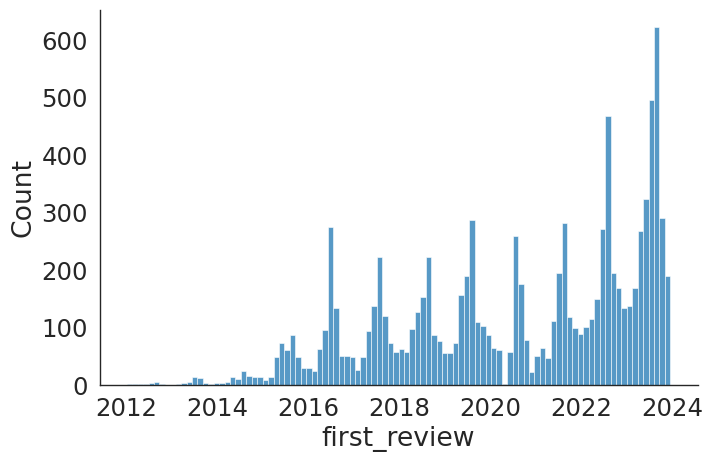

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="first_review", kind="hist", bins = 100, aspect = 1.5)

In [34]:
#median_value_fr = df['first_review'].dropna().median()

# Replace NaT values with the median value
#df['first_review'] = df['first_review'].fillna(median_value_fr)

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

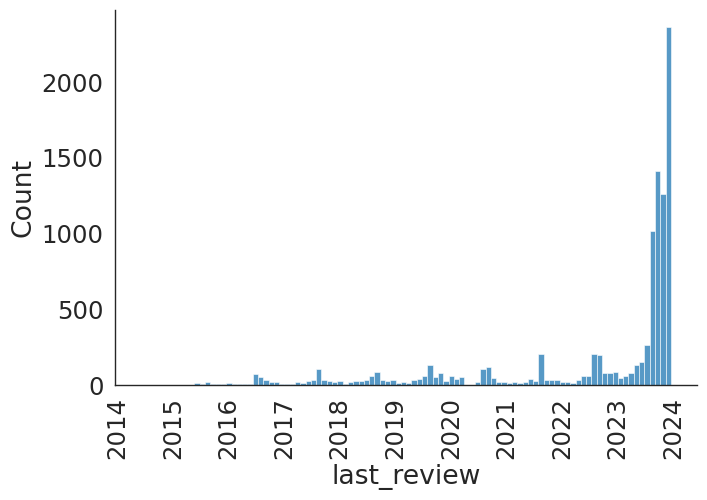

In [35]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="last_review", kind="hist", bins = 100, aspect = 1.5)
plt.xticks(rotation=90)

Text(0, 0.5, 'Frequency')

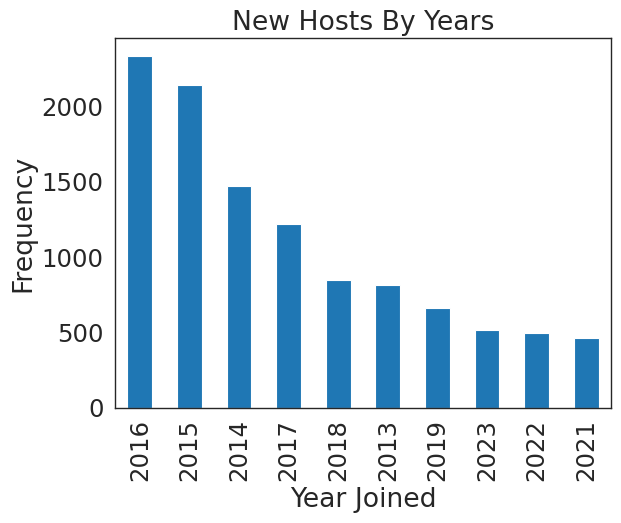

In [36]:
#df['host_since'] = pd.to_datetime(df['host_since'])

# Extract year from 'host_since' column
df['Year'] = df['host_since'].dt.year

hosts_by_year = df['Year'].value_counts().head(10).plot(kind = 'bar', title = "New Hosts By Years")
hosts_by_year.set_xlabel('Year Joined')
hosts_by_year.set_ylabel('Frequency')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            11854 non-null  int64         
 1   last_scraped                                  11854 non-null  datetime64[ns]
 2   source                                        11854 non-null  object        
 3   host_since                                    11854 non-null  datetime64[ns]
 4   host_response_time                            6806 non-null   object        
 5   host_response_rate                            6806 non-null   object        
 6   host_acceptance_rate                          8404 non-null   object        
 7   host_is_superhost                             11842 non-null  object        
 8   host_listings_count                           11854 non-null  int6

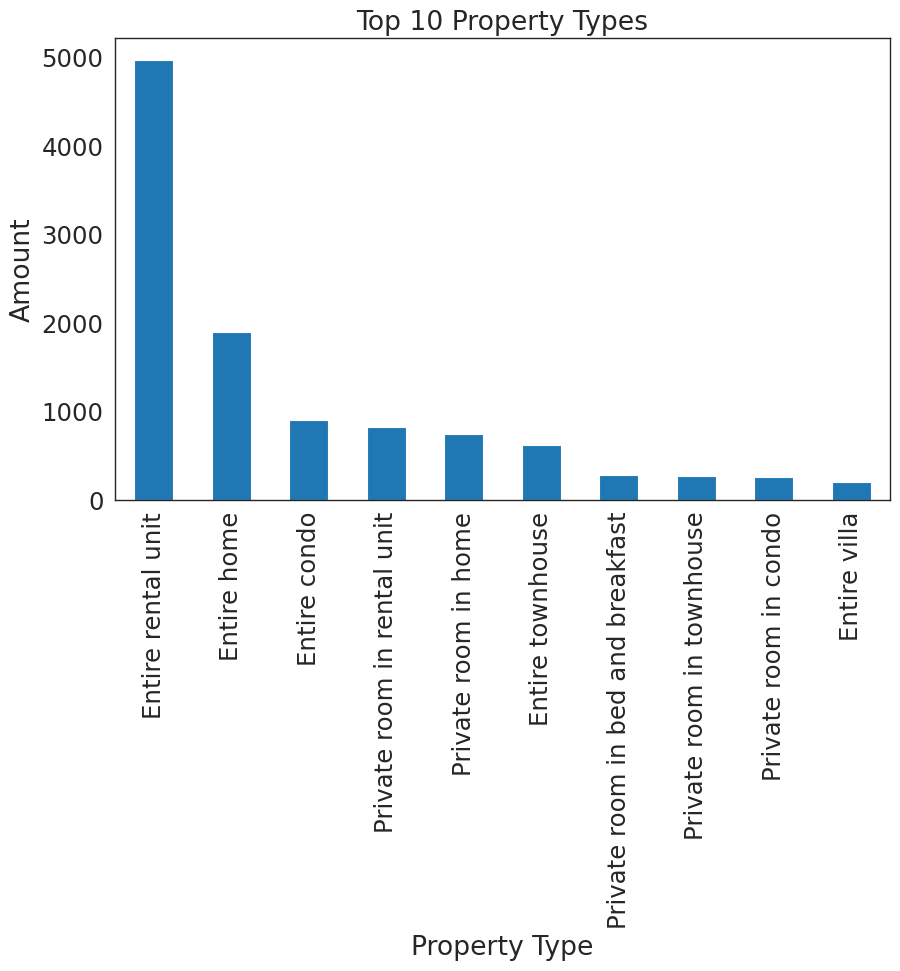

In [38]:
#Top 10 Property Types

top_10_property_types = df['property_type'].value_counts().head(10)

# Plot the distribution of top 10 property types
plt.figure(figsize=(10, 6))
top_10_property_types.plot(kind='bar')
plt.title('Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Frequency')

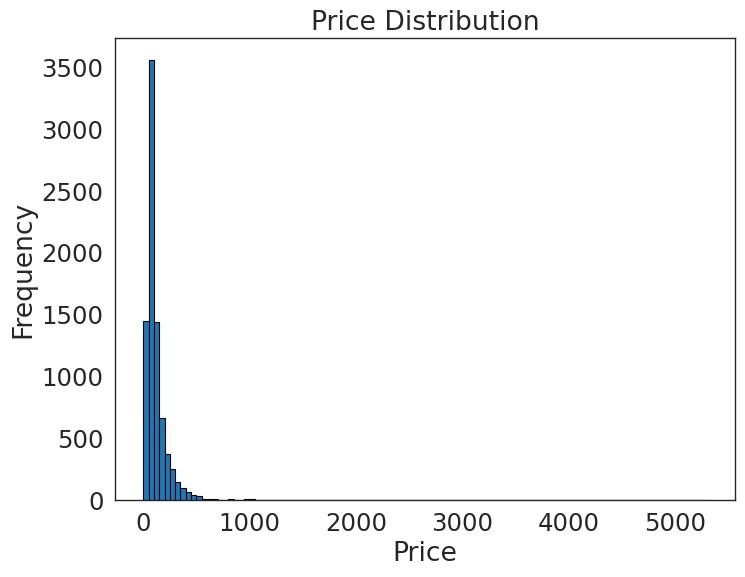

In [39]:
#Plot a histogram or box plot of prices to understand the distribution of prices across different properties.
#This plot might help me identify outliers and understand the general pricing trends.

bin_edges = np.arange(0, df['price'].max() + 50, 50)

# Plot the distribution of prices with custom bin edges
plt.figure(figsize=(8, 6))
plt.hist(df['price'].dropna(), bins=bin_edges, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')


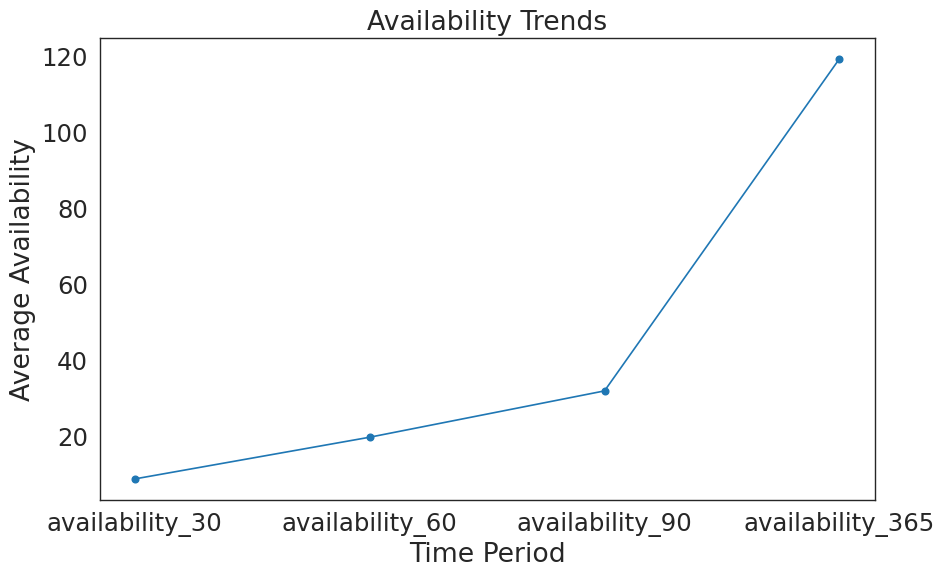

In [40]:
#Plot line graphs showing the availability of properties over time.
#This plot might help me understand the booking patterns and seasonal trends.

availability_columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
availability_data = df[availability_columns].mean()

plt.figure(figsize=(10, 6))
availability_data.plot(kind='line', marker='o')
plt.title('Availability Trends')
plt.xlabel('Time Period')
plt.ylabel('Average Availability')
plt.xticks(range(len(availability_columns)), availability_columns)
plt.show()

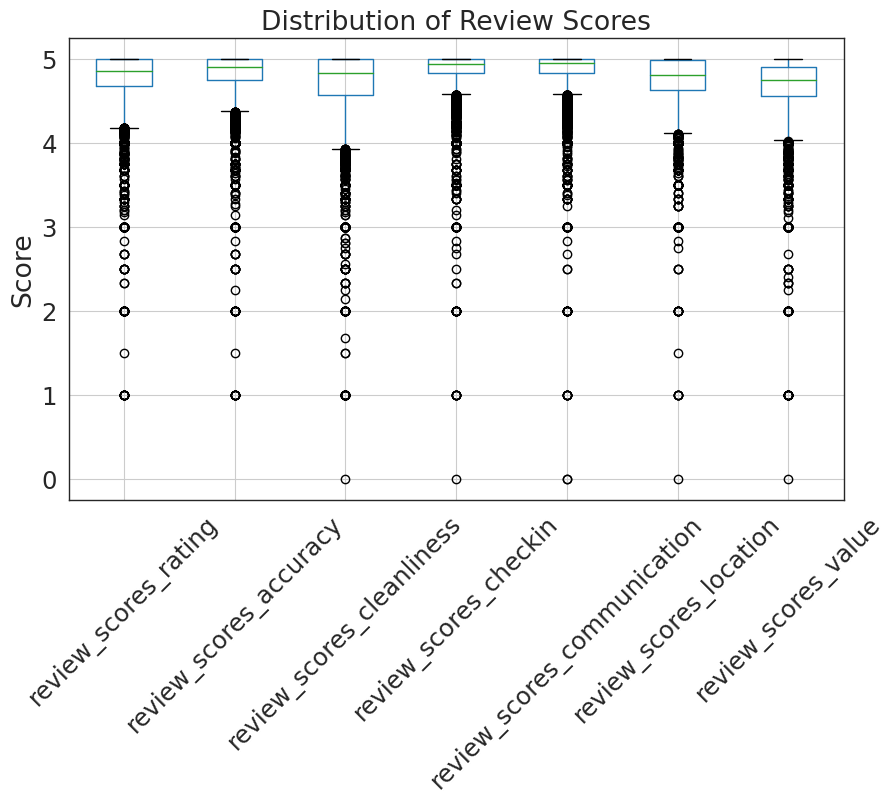

In [41]:
#Distribution of review scores.
#No surprize, but the Review Scores distribute from 0 to 5.
#Though, I thought it will give me some insights into the overall satisfaction level of guests.

review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                         'review_scores_value']
df_review_scores = df[review_scores_columns].dropna()

plt.figure(figsize=(10, 6))
df_review_scores.boxplot(rot=45)
plt.title('Distribution of Review Scores')
plt.ylabel('Score')
plt.show()



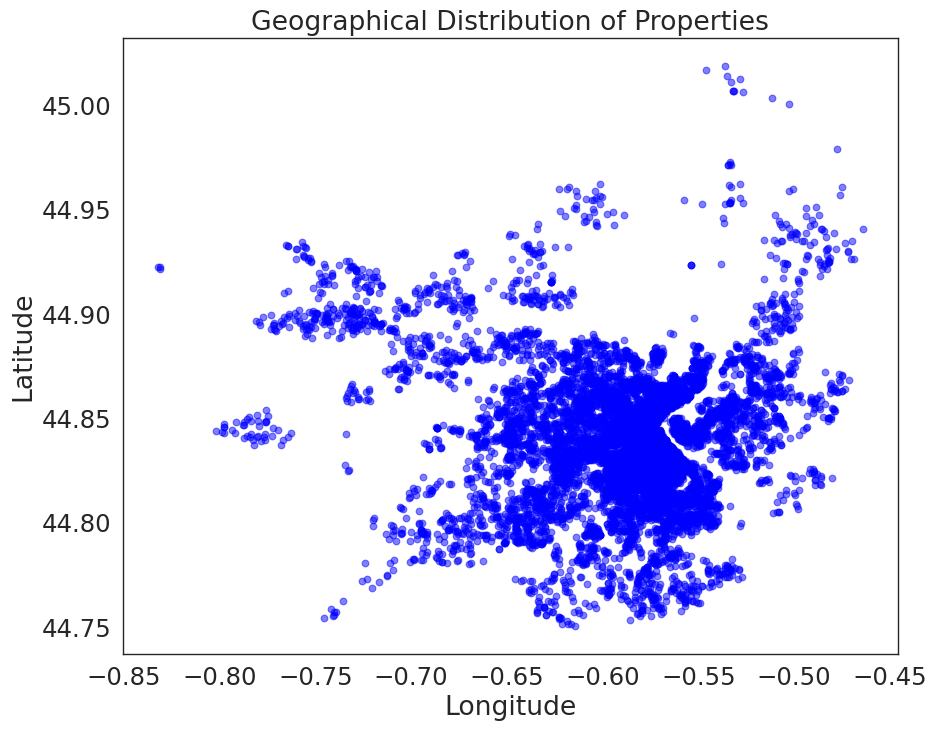

In [42]:
# Plot geographical distribution of properties
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='b')
plt.title('Geographical Distribution of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

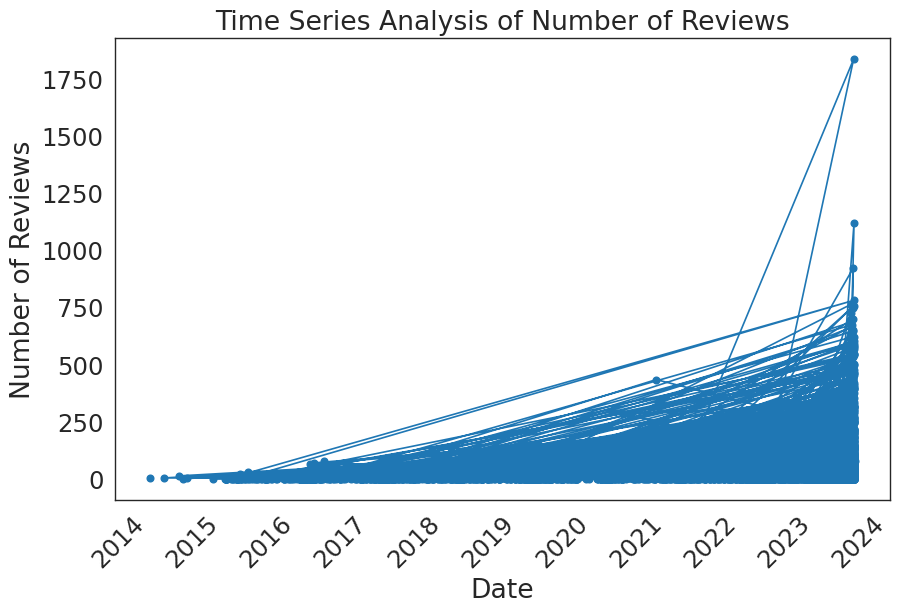

In [43]:
# Plot time series analysis for number of reviews
plt.figure(figsize=(10, 6))
plt.plot(df['last_review'], df['number_of_reviews'], marker='o', linestyle='-')
plt.title('Time Series Analysis of Number of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

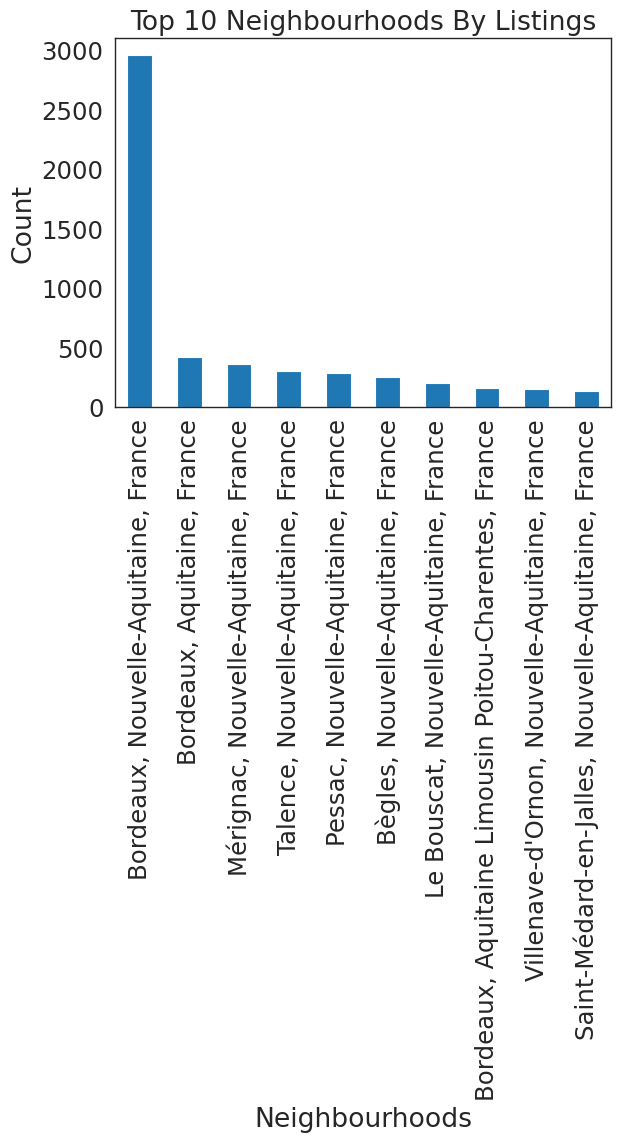

In [44]:
neighbourhood_gr = df['neighbourhood'].value_counts().head(10).plot(kind = 'bar', title = "Top 10 Neighbourhoods By Listings")
neighbourhood_gr.set_xlabel('Neighbourhoods')
neighbourhood_gr.set_ylabel('Count')

<ipython-input-45-6ab5a05c8f71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price, y=correlation_with_price.index, palette='coolwarm')


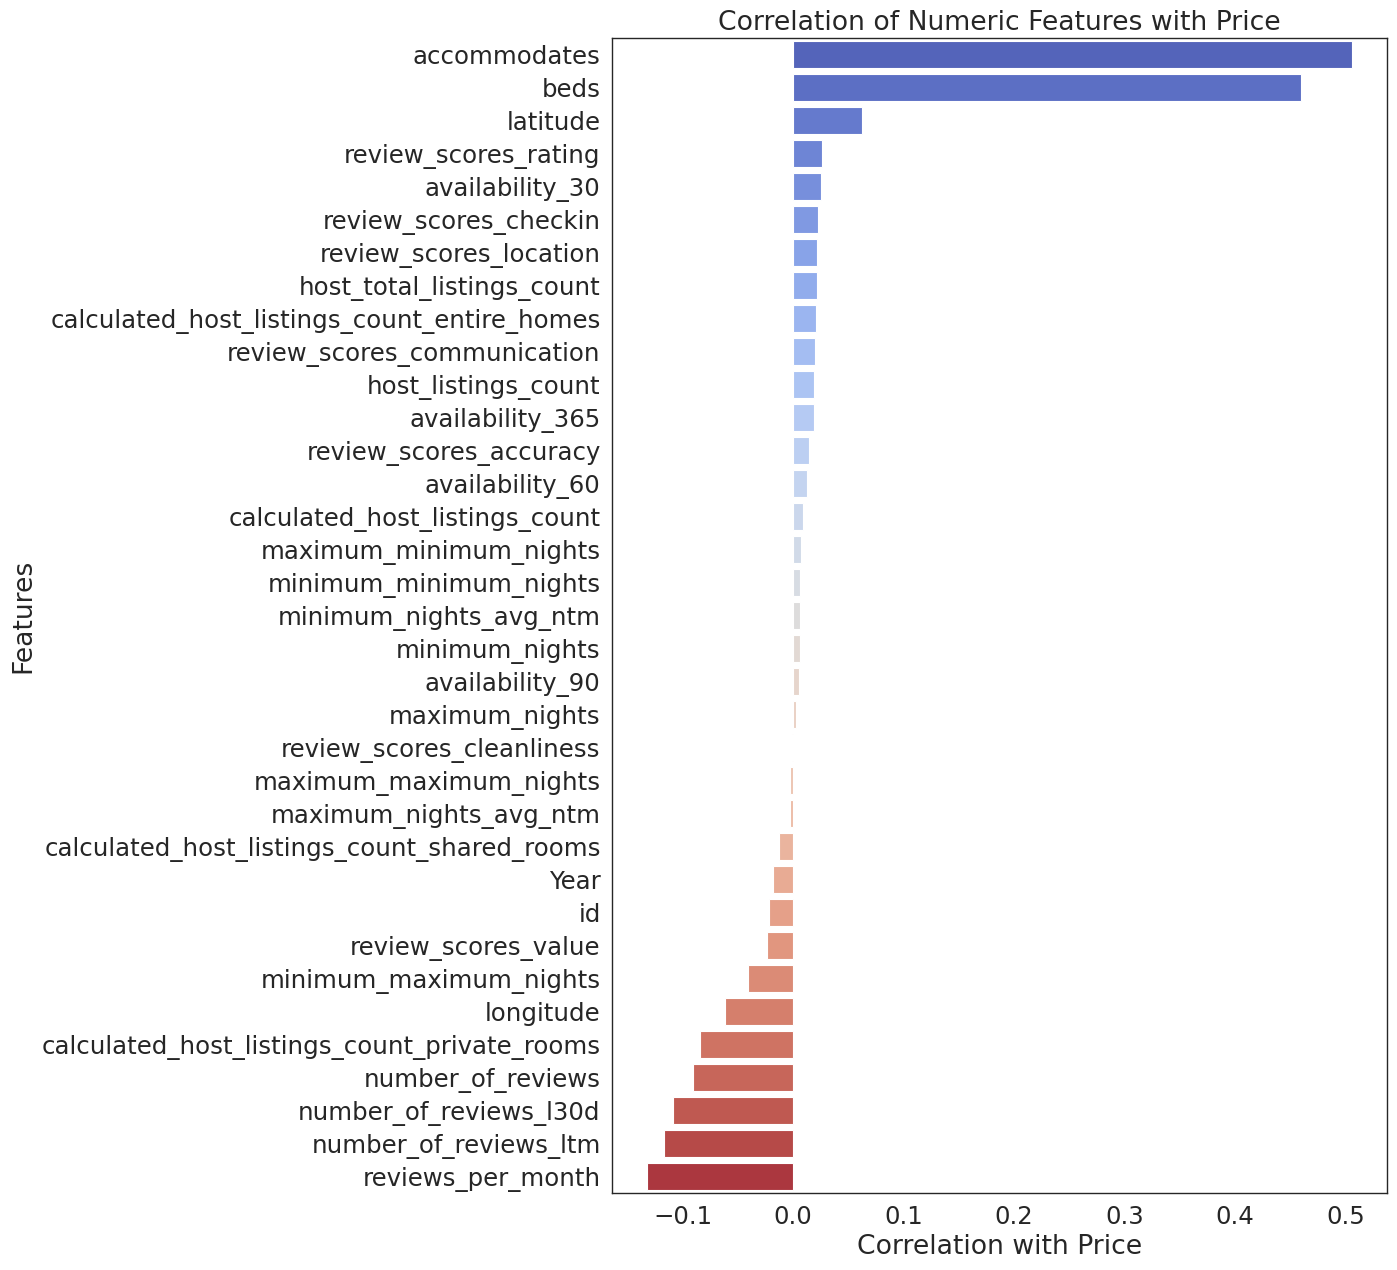

In [45]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Extract correlation values for 'price' column
correlation_with_price = correlation_matrix['price'].drop('price').sort_values(ascending=False)

# Plot the correlations with 'price'
plt.figure(figsize=(10, 15))
sns.barplot(x=correlation_with_price, y=correlation_with_price.index, palette='coolwarm')
plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.title('Correlation of Numeric Features with Price')
plt.show()

In [46]:
#Average_price of property according to the location
pd.set_option('display.max_rows', None)
avg_preffered_price_df = df.groupby(['neighbourhood_group_cleansed','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,neighbourhood_group_cleansed,room_type,Average Price
0,Ambars-et-Lagrave,Entire home/apt,109.243902
1,Ambars-et-Lagrave,Private room,48.937500
2,Ambars-et-Lagrave,Shared room,35.000000
3,Ambs,Entire home/apt,59.666667
4,Ambs,Private room,42.200000
5,Artigues-Prs-Bordeaux,Entire home/apt,124.263158
6,Artigues-Prs-Bordeaux,Private room,82.904762
7,Bassens,Entire home/apt,145.842105
8,Bassens,Hotel room,NaN
9,Bassens,Private room,40.600000


In [47]:
 df['price'].isnull().sum()

3692

In [49]:
#df.dropna(subset=['price'], inplace=True)

In [50]:
 df['price'].isnull().sum()

0

In [48]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = df.groupby('neighbourhood_group_cleansed',as_index=False)['host_since'].count().sort_values(['host_since'], ascending=False).rename(columns={'neighbourhood_group_cleansed':'Location','host_since':'Hosts'})
no_of_host_per_location

,Location,Hosts
6,Bordeaux,6663
19,Merignac,726
26,Talence,583
21,Pessac,579
4,Bgles,482
14,Le Bouscat,355
27,Villenave-d'Ornon,323
10,Cenon,278
24,Saint-Mdard-en-Jalles,268
8,Bruges,210


In [49]:
df.columns

Index(['id', 'last_scraped', 'source', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'revie

In [50]:
df['price'].mean()

115.04386179857877

<Axes: xlabel='Year', ylabel='beds'>

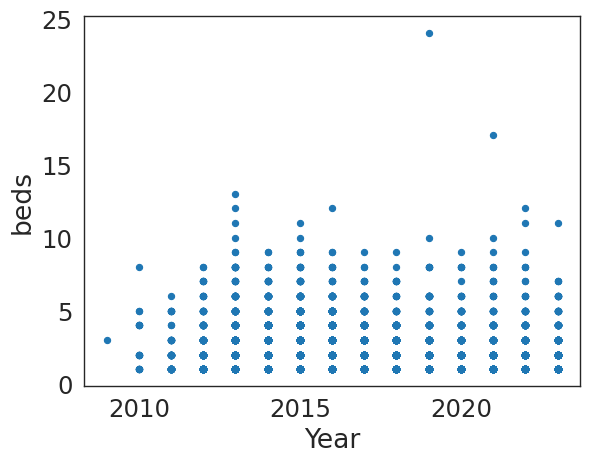

In [55]:
df.plot(kind = 'scatter', x = 'Year', y = 'beds')

<Axes: xlabel='review_scores_checkin', ylabel='review_scores_rating'>

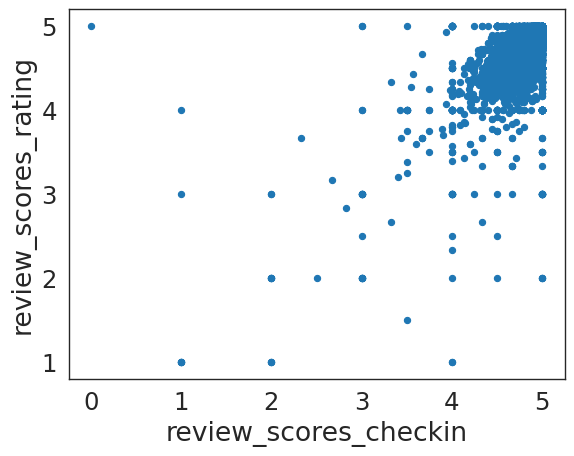

In [64]:
df.plot(kind = 'scatter', x = 'review_scores_checkin', y = 'review_scores_rating')

### As I reviewed the plots I've created and analyzed all available data, I began to ponder over the primary research question.
### For an investor contemplating short-term rental properties in Bordeaux, understanding the potential **revenue** is crucial. Thus, to offer insights essential for guiding investment strategies, I delved deeper into **revenue** analysis.